In [756]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset

In [757]:
n_samples = 30
X = np.concatenate((
    np.random.normal((2,2), size = (n_samples, 2),),
    np.random.normal((-3,-2), size = (n_samples, 2)),
    np.random.normal((9,0), size = (n_samples, 2)),
    np.random.normal((5,-5), size = (n_samples, 2))*3
))

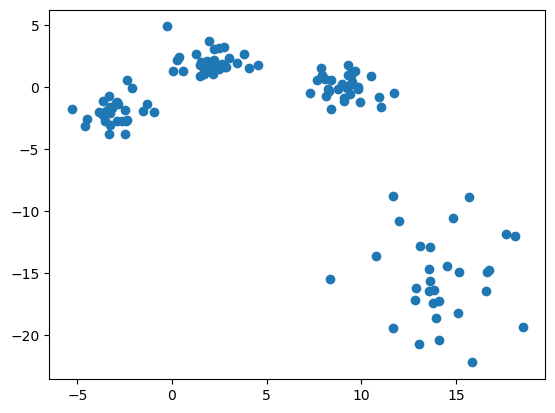

In [758]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

# DBSCAN

In [759]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=2.4, min_samples=5)
dbscan.fit(X)
dbscan_labels = dbscan.labels_

# OPTICS

In [760]:
from sklearn.cluster import OPTICS
optics = OPTICS(min_samples=7, xi=0.27)
optics.fit(X)
optics_labels = optics.labels_

# OPTICS vs DBSCAN

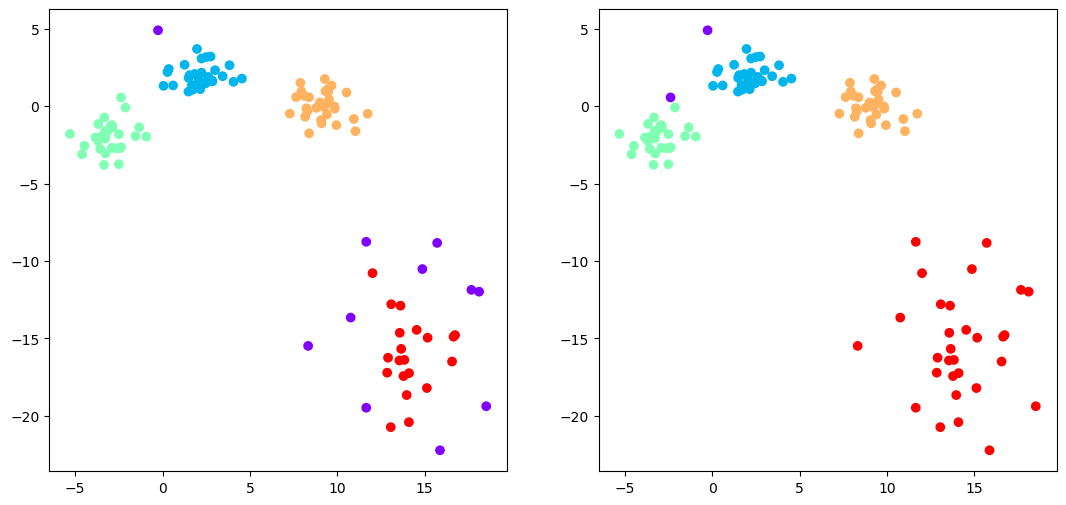

In [761]:
fig, axes = plt.subplots(1, 2, figsize=(13,6))
axes[0].scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap='rainbow')
axes[1].scatter(X[:, 0], X[:, 1], c=optics_labels, cmap='rainbow')

# Outliers

In [762]:
np.sum(dbscan_labels == -1)

11

In [763]:
np.sum(optics_labels == -1)

2

# Reachability Plot

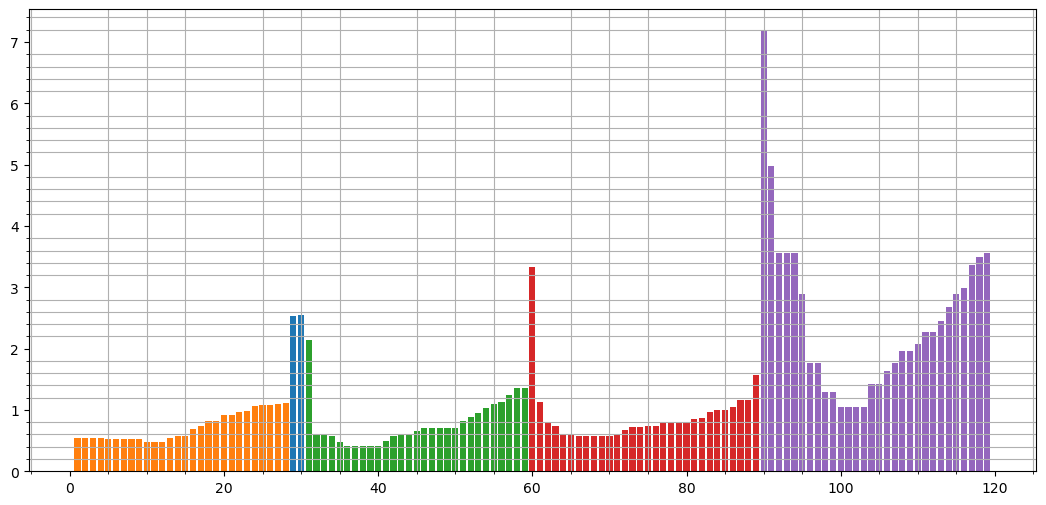

In [764]:
colors = ["#00ADB5", "#FF5376", "#724BE5", "#FDB62F", "#ff4BE5"]
reachability = optics.reachability_[optics.ordering_]
ordering_labels = optics.labels_[optics.ordering_]
unique_labels = np.unique(ordering_labels)
space = np.arange(len(X))

plt.figure(figsize=(13, 6))
for label, color in zip(unique_labels, colors):
    x = space[ordering_labels == label]
    y = reachability[ordering_labels == label]
    
    plt.bar(x, y)
#     plt.scatter(x, y)
#     plt.fill_between(x, y, color=color, alpha=0.5)

plt.grid(which = "minor")
plt.minorticks_on()

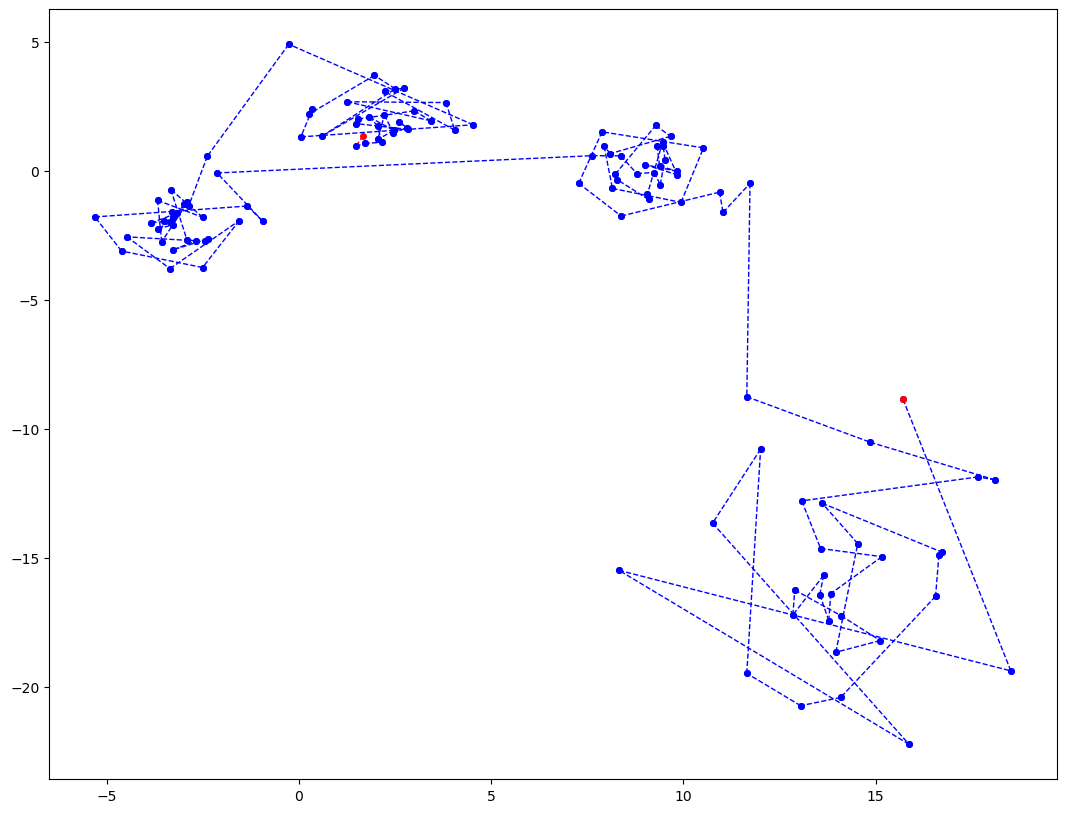

In [780]:
plt.figure(figsize=(13, 10))
for i in range(0, 120, 1):
    plt.plot(
        X[optics.ordering_[i:i+2], 0],
        X[optics.ordering_[i:i+2], 1],
        color='red' if ((i==0) or (i==119)) else 'blue',
        marker='o',
        linestyle='dashed',
        linewidth=1,
        markersize=4
        )
    